### Preliminaries

In [1]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run prelims
import opc_python
from opc_python.utils import loading, scoring
from opc_python.gerkin import dream,fit1,fit2,params

### Load the data

#### Full matrix with test and retest

In [2]:
data = loading.load_data_matrix(gold_standard_only=True)

In [3]:
only_replicates = data.copy()
only_replicates.mask[:,:,:,:,0] = (data.mask[:,:,:,:,0] + data.mask[:,:,:,:,1])>0
only_replicates.mask[:,:,:,:,1] = (data.mask[:,:,:,:,0] + data.mask[:,:,:,:,1])>0

r_rep = {_:np.zeros(21) for _ in ['gross','sc1_mean','sc1_std','mol_mean','mol_std','sc2_mean','sc2_std']}
for desc in range(21):
    dil = 1 if desc==0 else slice(None)
    orig = only_replicates[:,:,desc,dil,0]
    rep = only_replicates[:,:,desc,dil,1]
    if len(orig.shape)==3:
        orig = orig.mean(axis=2)
        rep = rep.mean(axis=2)
    r_rep['gross'][desc] = np.ma.corrcoef(orig.ravel(),rep.ravel())[0,1]
    r_rep['sc1_mean'][desc] = np.ma.corrcoef(orig.mean(axis=0),rep.mean(axis=0))[0,1] # Avg subjects, then correlate.
    r_rep['sc1_std'][desc] = np.ma.corrcoef(orig.std(axis=0),rep.std(axis=0))[0,1]
    r_rep['mol_mean'][desc] = np.ma.corrcoef(orig.mean(axis=1),rep.mean(axis=1))[0,1]
    r_rep['mol_std'][desc] = np.ma.corrcoef(orig.std(axis=1),rep.std(axis=1))[0,1]
    r_subs = np.ma.empty(49)
    for subject in range(49):
        r_subs[subject] = np.ma.corrcoef(orig[subject,:],rep[subject,:])[0,1]
    r_rep['sc2_mean'][desc] = r_subs.mean() # Correlate, then avg subjects.
    r_rep['sc2_std'][desc] = r_subs.std()

In [5]:
descriptors = loading.get_descriptors()
for desc in sorted(descriptors):
    index = descriptors.index(desc)
    print('%s: %.3f' % (desc,r_rep['gross'][index]))

ACID: 0.268
AMMONIA/URINOUS: 0.246
BAKERY: 0.206
BURNT: 0.510
CHEMICAL: 0.363
COLD: 0.328
DECAYED: 0.280
FISH: 0.494
FLOWER: 0.340
FRUIT: 0.537
GARLIC: 0.510
GRASS: 0.271
INTENSITY/STRENGTH: 0.453
MUSKY: 0.402
SOUR: 0.259
SPICES: 0.223
SWEATY: 0.347
SWEET: 0.533
VALENCE/PLEASANTNESS: 0.526
WARM: 0.329
WOOD: 0.378


In [6]:
for desc in sorted(descriptors):
    index = descriptors.index(desc)
    print('%s: %.3f' % (desc,r_rep['sc1_mean'][index]))

ACID: 0.616
AMMONIA/URINOUS: 0.685
BAKERY: 0.789
BURNT: 0.782
CHEMICAL: 0.652
COLD: 0.566
DECAYED: 0.952
FISH: 0.631
FLOWER: 0.822
FRUIT: 0.958
GARLIC: 0.900
GRASS: 0.138
INTENSITY/STRENGTH: 0.736
MUSKY: 0.649
SOUR: 0.773
SPICES: 0.555
SWEATY: 0.361
SWEET: 0.955
VALENCE/PLEASANTNESS: 0.920
WARM: 0.271
WOOD: 0.730


In [7]:
for desc in sorted(descriptors):
    index = descriptors.index(desc)
    print('%s: %.3f' % (desc,r_rep['sc2_mean'][index]))

ACID: 0.150
AMMONIA/URINOUS: 0.123
BAKERY: 0.217
BURNT: 0.404
CHEMICAL: 0.301
COLD: 0.152
DECAYED: 0.222
FISH: 0.446
FLOWER: 0.279
FRUIT: 0.578
GARLIC: 0.582
GRASS: 0.158
INTENSITY/STRENGTH: 0.391
MUSKY: 0.278
SOUR: 0.177
SPICES: 0.119
SWEATY: 0.231
SWEET: 0.536
VALENCE/PLEASANTNESS: 0.466
WARM: 0.028
WOOD: 0.261


In [8]:
# Taken from previous fits.  
best = {}
best['sc1_mean'] = np.array([0.70097375,  0.66613775,  0.60919667,  0.71083115,  0.72697513,
        0.41324559,  0.67517077,  0.35532091,  0.32683721,  0.5739374 ,
        0.4174755 ,  0.45235007,  0.17290684,  0.42151002,  0.48610618,
        0.3819078 ,  0.52868636,  0.33612901,  0.35745922,  0.51474916,
        0.64789066]) 
best['sc1_std'] = np.array([ 0.38      ,  0.4       ,  0.49785038,  0.63549459,  0.73547243,
        0.45797419,  0.5945972 ,  0.4086892 ,  0.40109547,  0.52394973,
        0.50651325,  0.61262666,  0.31698427,  0.44576133,  0.45793596,
        0.50874842,  0.47298217,  0.34315854,  0.3857553 ,  0.50038353,
        0.69402738])

In [9]:
best['sc1_mean'] = np.array(
[0.59433116942901731,
 0.75688550530750887,
 0.66000211909766104,
 0.80916488849299328,
 0.87909642377508124,
 0.44813672815074918,
 0.9633037574032004,
 0.45638360118626681,
 0.5145973162199784,
 0.44202448223282376,
 0.3243951440359365,
 0.50790735652009433,
 0.20750377603327794,
 0.5927224636143803,
 0.791150785360066,
 0.43433903945468916,
 0.7062671515775153,
 0.58294837665683219,
 0.44414605801453899,
 0.51827780983148208,
 0.71165848183441571] 
)

best['sc2_mean'] = np.array(
[0.3990212312167894,
 0.45316456090695306,
 0.096355868497660965,
 0.47235605015083787,
 0.48880747261958296,
 0.099698545974087616,
 0.39021758853417338,
 0.18006681694431934,
 0.11002077922626755,
 0.15477836709805751,
 0.097083218212694444,
 0.1963688812133417,
 0.11680376692624622,
 0.18247336617154572,
 0.14498307226649484,
 0.079897352830138144,
 0.21283994018993782,
 0.19695303356543159,
 0.097350809185906606,
 0.15805413767741722,
 0.39053768243749137]
)

best['sc2_std'] = best['sc2_mean']

In [13]:
def plot_test_retest(sc):
    matplotlib.rcParams.update({'font.size': 16})
    fig,ax = plt.subplots(1,2,squeeze=False,sharey=False,figsize=(12,7))

    def plot_predictability(col,sc):
        for row,stat in [(0,'%s_mean'%sc),]:#(1,'std')]:
            if col==0:
                ax[row,col].scatter(range(1,22),r_rep[stat][order[stat]],color='darkcyan')
                ax[row,col].scatter(range(1,22),best[stat][order[stat]],color='r')
            elif col==1:
                ax[row,col].scatter(range(1,22),100*ratio[stat][order[stat]],color='g')
            ax[row,col].set_xlim(0,22)
            ax[row,col].set_xticks(range(1,22))
            ax[row,col].set_xticklabels(np.array(descriptors)[order[stat]], fontdict={'fontsize':11}, rotation=90)

    order = {}
    order['%s_mean'%sc] = np.argsort(r_rep['%s_mean'%sc])[::-1]
    order['%s_std'%sc] = np.argsort(r_rep['%s_std'%sc])[::-1]
    plot_predictability(0,sc)

    ratio = {}
    ratio['%s_mean'%sc] = best['%s_mean'%sc]**2 / r_rep['%s_mean'%sc]**2
    ratio['%s_std'%sc] = best['%s_std'%sc]**2 / r_rep['%s_std'%sc]**2
    for kind in ['%s_mean'%sc,'%s_std'%sc]:
        for i in range(len(ratio[kind])):
            ratio[kind][i] = min(1,ratio[kind][i])
    order['%s_mean'%sc] = np.argsort(ratio['%s_mean'%sc])[::-1]
    order['%s_std'%sc] = np.argsort(ratio['%s_std'%sc])[::-1]
    plot_predictability(1,sc)

    ax[0,0].set_ylabel(r'$R_\mu$')
    #ax[1,0].set_ylabel(r'$R_\sigma$')
    for row in [0]:#,1]:
        ax[row,1].set_ylabel('% variance explained',fontdict={'fontsize':14})
        ax[row,0].set_ylim(0,1)
        ax[row,1].set_yticks(range(0,105,20))    
        ax[row,1].set_yticklabels(range(0,105,20))    
        ax[row,1].set_ylim(0,105)  
    ax[0,0].set_xlabel('Ordered by\ntest-retest correlation')
    ax[0,1].set_xlabel('Ordered by\nrelative variance explained')

    plt.tight_layout()

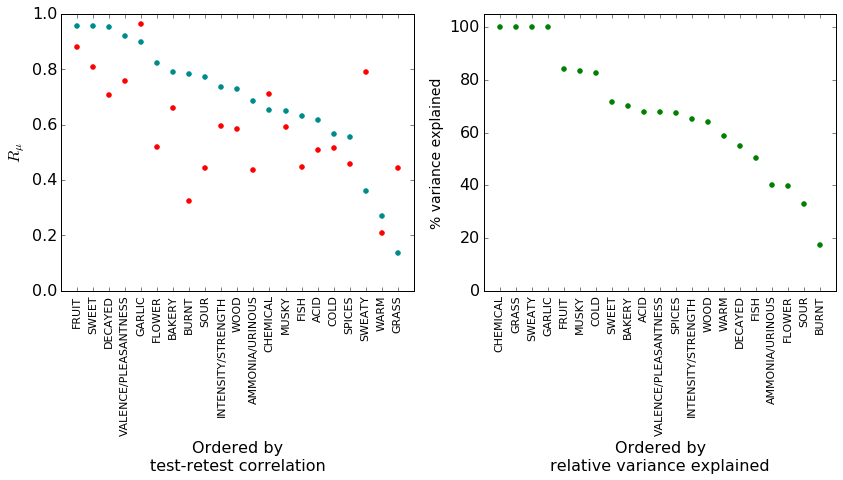

In [14]:
plot_test_retest('sc1')

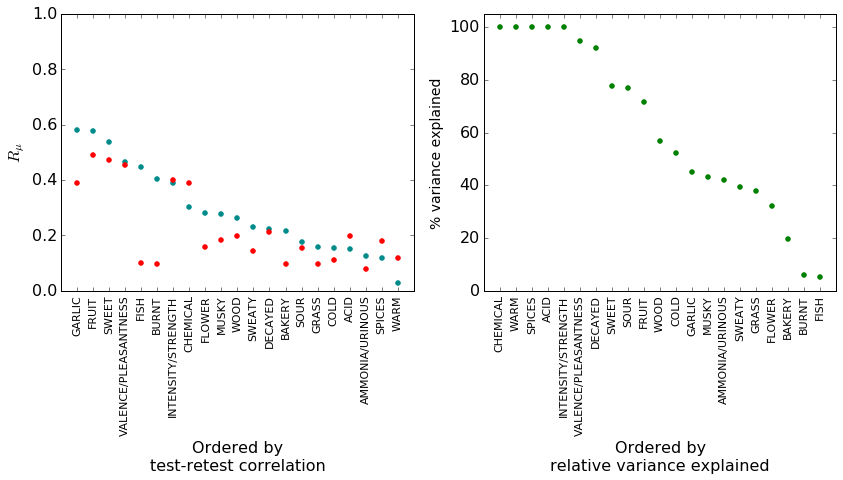

In [15]:
plot_test_retest('sc2')

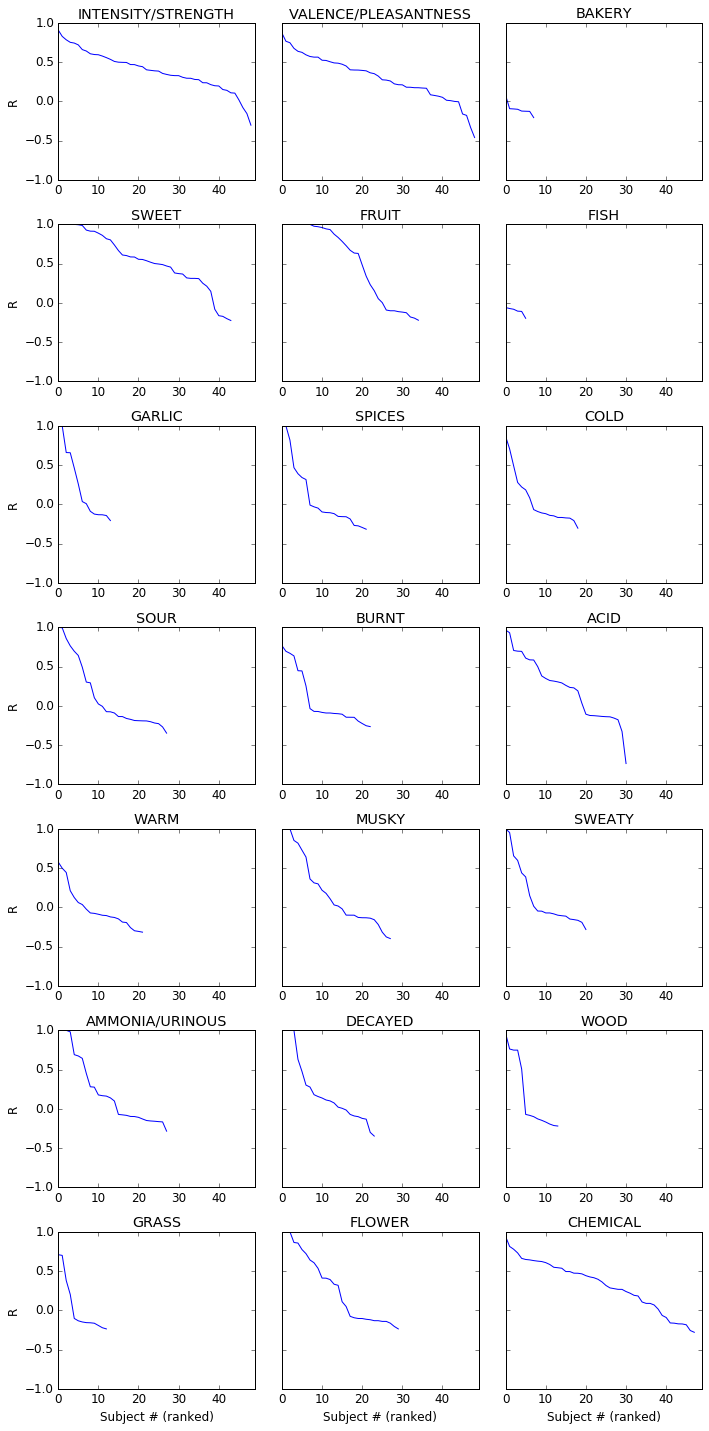

In [14]:
import sys
matplotlib.rcParams.update({'font.size': 12})
fig,axes = plt.subplots(7,3,sharey=True,figsize=(10,20))
ax = axes.flat
for desc in range(21):
    rs = []
    for subject in range(49):
        orig = only_replicates[subject,:,desc,1,0]
        rep = only_replicates[subject,:,desc,1,1]
        r = np.ma.corrcoef(orig,rep)[0,1]
        if r:
            rs.append(r)
        else:
            if orig.sum() and rep.sum():
                pass
                #print(orig)
                #print(rep)
                #print('=====================')
    ax[desc].plot(sorted(rs,reverse=True))
    ax[desc].set_xlim(0,49)
    ax[desc].set_ylim(-1,1)
    ax[desc].set_title(perceptual_headers[6:][desc])
    if desc % 3 == 0:
        ax[desc].set_ylabel('R')
    if desc >= 18:
        ax[desc].set_xlabel('Subject # (ranked)')
plt.tight_layout()

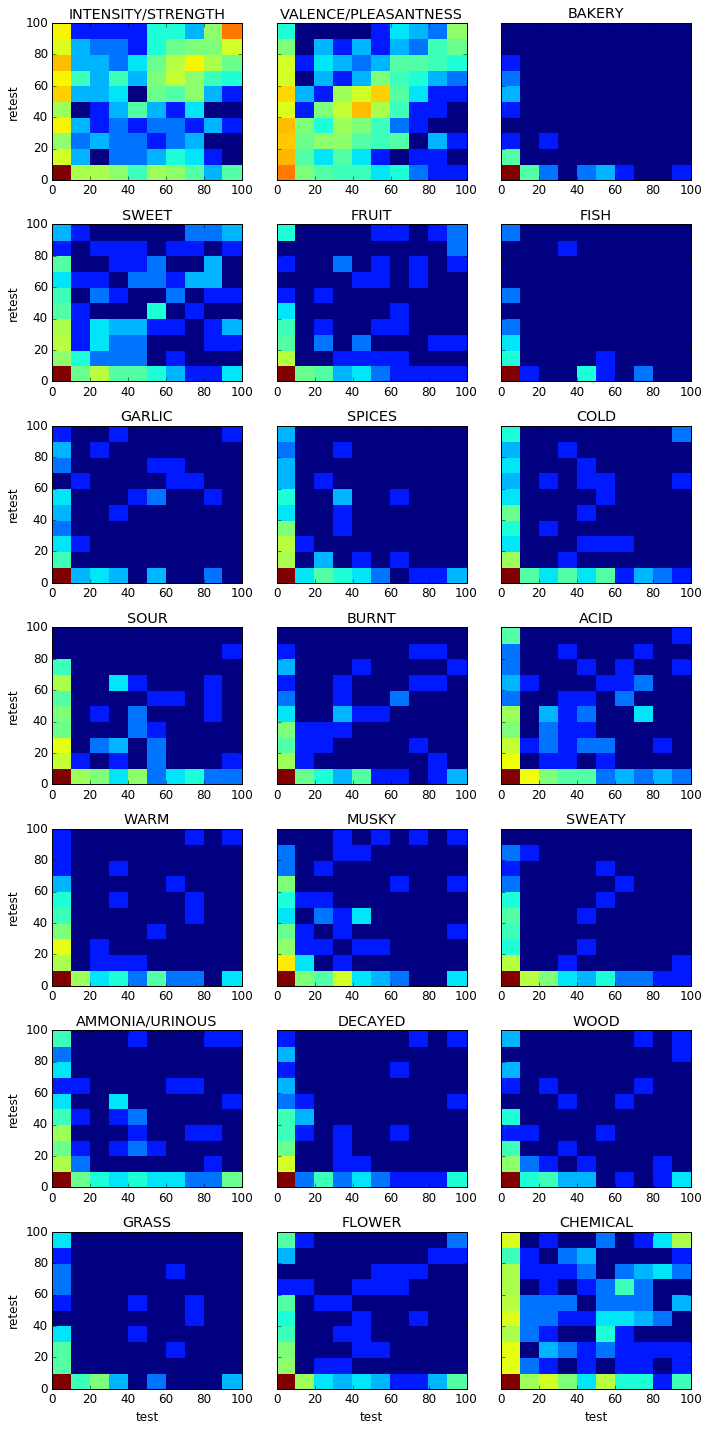

In [16]:
import sys
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 12})
fig,axes = plt.subplots(7,3,sharey=True,figsize=(10,20))
ax = axes.flat
for desc in range(21):
    orig = only_replicates[:,:,desc,1,0].ravel().filled()
    rep = only_replicates[:,:,desc,1,1].ravel().filled()
    xedges = np.linspace(-0.001,100.001,11)
    yedges = np.linspace(-0.001,100.001,11)
    H, xedges, yedges = np.histogram2d(rep, orig, bins=(xedges, yedges))
    X, Y = np.meshgrid(xedges, yedges)
    ax[desc].pcolormesh(X, Y, 1+H, norm=LogNorm(1,100))
    #ax[desc].set_aspect('equal')
    ax[desc].set_title(perceptual_headers[6:][desc])
    ax[desc].set_xlim(0,100)
    ax[desc].set_ylim(0,100)
    if desc % 3 == 0:
        ax[desc].set_ylabel('retest')
    if desc >= 18:
        ax[desc].set_xlabel('test')
plt.tight_layout()